#### 一、模型搭建

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
df = pd.read_excel('客户信息及违约表现.xlsx')
# 1.提取特征变量和目标变量
X = df.drop(columns='是否违约')
y = df['是否违约']

# 2.划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 3.模型训练及搭建
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
print(clf)  # 这里可以将训练好的模型打印出来看看

# 此时的模型已经训练好了，在下一小节就可以利用该模型来进行预测了

DecisionTreeClassifier(max_depth=3)


In [4]:
df

,收入,年龄,性别,历史授信额度,历史违约次数,是否违约
0,503999,46,1,0,1,1
1,452766,36,0,13583,0,1
2,100000,33,1,0,1,1
3,100000,25,0,0,1,1
4,258000,35,1,0,0,1
...,...,...,...,...,...,...
995,510666,44,1,5000,0,0
996,490000,40,0,0,0,0
997,333333,44,1,10000,0,0
998,480000,38,1,0,0,0


#### 二、模型预测及评估

#### 1.直接预测是否违约

In [5]:

y_pred = clf.predict(X_test)
print(y_pred)

# 将预测值和实际值汇总看一下
s = pd.DataFrame()  # 创建一个空DataFrame
s['预测值'] = list(y_pred)
s['实际值'] = list(y_test)
print(s.tail(10))

# 查看模型预测准确度
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

[0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0
 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1]
     预测值  实际值
190    0    0
191    0    0
192    0    1
193    0    0
194    0    0
195    0    0
196    0    0
197    0    0
198    1    0
199    1    1
0.825


#### 2.预测不违约&违约概率

In [6]:

y_pred_proba = clf.predict_proba(X_test)
print(y_pred_proba)  # 打印看看预测的不违约&违约概率，此时获得y_pred_proba是个二维数组，共两列，左列为不违约概率，右列为违约概率

# 只查看违约概率,其中中括号中第一个元素：冒号表示全部行，第二个元素：1表示第二列，如果把
print(y_pred_proba[:, 1])


[[0.86004515 0.13995485]
 [0.86004515 0.13995485]
 [0.86004515 0.13995485]
 [0.86004515 0.13995485]
 [0.55782313 0.44217687]
 [0.86004515 0.13995485]
 [0.86004515 0.13995485]
 [0.86004515 0.13995485]
 [0.55782313 0.44217687]
 [0.04065041 0.95934959]
 [0.86004515 0.13995485]
 [0.04065041 0.95934959]
 [0.86004515 0.13995485]
 [0.55782313 0.44217687]
 [0.86004515 0.13995485]
 [0.04065041 0.95934959]
 [0.         1.        ]
 [0.04065041 0.95934959]
 [0.86004515 0.13995485]
 [0.86004515 0.13995485]
 [0.86004515 0.13995485]
 [0.86004515 0.13995485]
 [0.86004515 0.13995485]
 [0.86004515 0.13995485]
 [0.86004515 0.13995485]
 [0.04065041 0.95934959]
 [0.86004515 0.13995485]
 [0.86004515 0.13995485]
 [0.86004515 0.13995485]
 [0.86004515 0.13995485]
 [0.55782313 0.44217687]
 [0.86004515 0.13995485]
 [0.86004515 0.13995485]
 [0.86004515 0.13995485]
 [0.86004515 0.13995485]
 [0.86004515 0.13995485]
 [0.86004515 0.13995485]
 [0.55782313 0.44217687]
 [0.86004515 0.13995485]
 [0.55782313 0.44217687]


#### 3.模型预测效果评估

         阈值       假正率       真正率
0  2.000000  0.000000  0.000000
1  1.000000  0.000000  0.162162
2  0.959350  0.015873  0.554054
3  0.750000  0.023810  0.567568
4  0.442177  0.182540  0.783784
5  0.139955  1.000000  1.000000


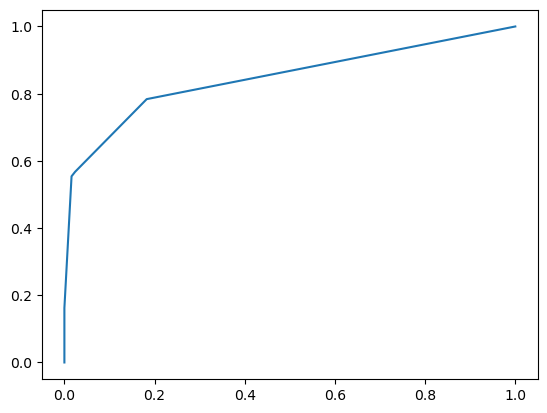

0.8464714714714715


In [7]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test.values, y_pred_proba[:, 1])

# 将阈值tpr、假警报率fpr、命中率tpr汇总看一下
s = pd.DataFrame()  # 创建一个空DataFrame
s['阈值'] = list(thres)
s['假正率'] = list(fpr)
s['真正率'] = list(tpr)
print(s)

# 绘制ROC曲线，注意图片展示完要将其关闭才会执行下面的程序
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()

# 求出AUC值
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test.values, y_pred_proba[:, 1])
print(score)


**Exercise4**

    上述示例中直接将原始数据输入给决策树模型，尝试先对原始数据中的['收入', '历史授信额度']列进行分箱后，再使用决策树模型进行分类并比较结果。